# UMAP and U

## Erik Amezquita

### Computational Mathematics, Science, and Engineering

### Michigan State University

#### May 2021

# Gameplan

- A quick overview on the [**UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction** paper](https://arxiv.org/abs/1802.03426) by L. McInnes, J. Healy, and J. Melville. 

- Drew intuition from McInnes [clear exposition](https://www.youtube.com/watch?v=nq6iPZVUxZU) at SciPy 2018.

- Took images, and more notes, from the [UMAP documentation](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html).

- Excellent [notes](https://adelejackson.github.io/files/Maths_of_UMAP.pdf) by Adele Jackson to get just a _bit_ more intuition on the mathematical formality. 

- I need to know category theory better to discuss the entrails


- Thus just a very high-level picture of what is going on

# Motivation: Curse of dimensionality

- The shape signatures produced by the Euler Charateristic Transform (ECT) are very high dimensional. 1000+ dimensions.


- High dimensional data does not bode well in general with machine learning algorithms. 

## Curse of dimensionality

### Catch-all term for weird things that happen at high dimensions

<img src="https://ejamezquita.github.io/barley/figs/curse_of_dimensionality.png" width=1100/>

- To fill the $d$-dimensional cube of side length $1$ with $N$ sub-cubes, these sub-cubes must be of side length $\ell=\left(\frac1N\right)^{\frac1d}$

- Since $\ell\to1$ as $d\to\infty$, we can fit infinite sub-cubes of length $1$ inside a cube of length $1$

- Sparsity blows up with dimension: Our intuition of "near" and "far" breaks down


- At very high dimensions, a sphere looks more like a porcupine.

# Motivation: Baseline and goal

- Reduce dimension of the ECT signals as a pre-processing step before attempting anything else

- Looking for something that works with the barley-seed dataset


- **Recall**: We extracted 11 traditional shape descriptors, not a terribly high number.

<img src="https://ejamezquita.github.io/barley/figs/seed_orientation1.png" width=600/>

- **Baseline**: Trained an SVM with the 11 traditional descriptors and managed to classify 28 different accessions with $55\%$ of accuracy. (80/20 training/testing, with 3100 seeds.)


- **Goal**: An SVM trained with the combination of traditional and _reduced-dimension_ topological descriptors musf fare better.

# Motivation: KPCA as a first successful attempt

- Attempted dimension reduction with PCA, Laplacian Eigenmaps, Multidimensional Scaling, Sammon Mapping, and Locally Linear Embeddings with poor results.

- Things improved with a non-linear kernel PCA and a very specific hyperparameters choice.

<img src="https://ejamezquita.github.io/barley/figs/parameters_combined_laplacedot_12.jpg" width=1300/>


<img src="https://ejamezquita.github.io/barley/figs/avg_accuracy_normalized_size_combined_158_8_laplacedot_12_horz_transp.png" width=1300/>

# (Real) Motivation: Unsupervised learning

- As a proof of concept, we have shown that the ECT effectively captures shape nuances that can tell apart different barley accessions from one another based solely on morphology.

<img src="https://ejamezquita.github.io/barley/figs/composite_cross_collection.png" width=1100/>

- Train an SVM with 100% of the founders
- Test with barley seeds from later generations
- Try to observe changes in shape across time.


- **Transform new data**: Reduce the dimensionality of the progeny ECTs using the **exact** same framework used to reduce the dimensionality of the founder ECTs

- KPCA fails at this: **all** progeny gets reduced to the same point.

- Change of KPCA hyperparameters alleviated this issue, **but** classification accuracy decreased.

# UMAP FTW

- UMAP is quite efficient at reducing the dimensionality of the founders **and** we can then use it to transform the progeny data.
- At least different progeny seeds are sent to different points.


- **Bonus**: We can now classify the founder seeds with $86\%$ of accuracy (SVM with combined descriptors, 80/20 split)
- So far just a vanilla exploration with UMAP.


- Semi-supervised learning results correspond to genomics results! (According to Dan Koenig)

<img src="https://ejamezquita.github.io/barley/figs/histogram_umap_gen7_d158_T16_vert.png" width=1000/>

# Theoretical foundations for UMAP

- Manifold theory
- Topological Data Analysis
- Category theory

---

- Local manifold approximations.
- Patches together their local fuzzy **simplicial set** representations to construct a topological representation of the high dimensional data: **nerve theorem**.
- Then replicate a similar topological representation at a lower dimension

# Uniform distribution of data on a manifold and geodesic approximation

- **First step**: Approximate the manifold $M$ of dimension $n$ we assume the data approximately lies on.
- Then approximate geodesic distance


- For the nerve trick to work, we assume that our data is uniformly distributed on $M$.
- This assumption is almost **never** true in real-life contexts.

<img src="https://umap-learn.readthedocs.io/en/latest/_images/how_umap_works_open_cover.png" width=1000/>

---

- Assume that the manifold has a Riemannian metric $g$ (not inherited from the ambient space) such that data is uniformly distributed with respect to $g$. 

# Riemannian geometry

**Definition**: The space of covariant $k$-tensor fields (smooth sections of $T^kM$) is $\mathcal T^k(M)$.

**Definition:** A **Riemannian metric** on a smooth manifold $M$ is a 2-tensor field $g\in\mathcal T^2(M)$ that is

- symmetric: $g(V,W) = g(V,W)$.
- positive definite: $g(V,V) > 0$ for every $V\neq0$.


A Riemannian metric thus defines an inner product on each tangent space $T_pM$, with $\langle V,W \rangle = g(V,W)$, for $V,W\in T_pM$

---

- At each point $p\in M$ we have an inner product $g$ on its tangent space $T_pM$ such that $g$ varies smoothly along $M$.


- With inner products at hand, we can define norms, curve lengths, and distance between points in $M$.


- Different tangent spaces $T_pM$ and $T_qM$ are not readily comparable: more structure and care is needed to define their _connection_.

---

- Given two Riemannian manifolds $(M_1,g_1)$ and $(M_2,g_2)$, an **isometry** is a diffeomorphism $\varphi:M_1\to M_2$ such that $d\varphi_p:T_pM_1\to T_{\varphi(p)}M_2$ is an isometry between Euclidean spaces $(T_pM_1, (g_1)_p)$, $(T_{\varphi(p)}M_2, (g_2)_{\varphi(p)})$, for every $p\in M_1$.

- That is, for every $u,v\in T_pM_1$, we have
$$(g_1)_p(u,v)=(g_2)_{\varphi(p)}(d\varphi_p(u), d\varphi_p(v))$$


- Riemmanian geometry is concerned primarily with properties that are preserved by isometries.

# Strike one: Approximate the underlying manifold

**Lemma 1**: Let $(M, g)$ be a Riemannian manifold in an ambient $\mathbb R^n$, and let $p\in M$ be a point. If $g$ is locally constant about $p$ in an open neighbourhood $U$ such that $g$ is a constant diagonal matrix in ambient coordinates, then in a ball $B\subset U$ centered at $p$ with volume $\displaystyle\frac{\pi^{\frac n2}}{\Gamma(\frac n2+1)}$ with respect to $g$, the geodesic distance from $p$ to any point $q\in B$ is $\frac 1r d_{\mathbb R^n}(p,q)$, where $r$ is the radius of the ball in the ambient space and $d_{\mathbb R^n}$ is the existing metric on the ambient space.

<img src="https://umap-learn.readthedocs.io/en/latest/_images/how_umap_works_local_metric_open_cover.png" width=1000/>

- Any ball of fixed volume should contain approximately the same number of points of $X$ regardless of where on the manifold it is centered.

- Given enough finite data and small enough neighborhoods, we should have a good crude approximation of $M$.


- Conversely, a ball centered at $X_i$ that contains exactly the $k$-nearest neighbors of $X_i$ should have approximately fixed volume regardless of the choice of $X_i\in X$.

- We can approximate geodesic distance from $X_i$ to its neighbors by normalising distances with respect to the distance to the $k$-th nearest neighbor of $X_i$.

- Fix $k$ as a hyperparameter, and write $\{X_{i_1},\ldots, X_{i_k}\}$ for the $k$ nearest neighbours of $X_i$ . 

- Then, from the lemma, we can derive that the distance in $M$ from $X_i$ to $X_j$ is approximately $\frac 1{r_i}d_{\mathbb R^n}(X_i,X_j)$, where $r_i$ is the distance to the $k$-th nearest neighbour of $X_i$. 


- **In the actual implementation:** To smooth this value, and reduce the impact of happening to have the $k$-th nearest neighbour be very far away while the $(k − 1)$-th nearest neighbours are clustered close to $X_i$, we take $r_i$ to be the value such that it fixes the cardinality of the fuzzy set of $1$-simplices to a fixed value.

- That is, 
$$\sum^k_{j=1}\exp\left(\frac{-|X_i - X_{i_j}|}{r_i}\right) = \log_2(k)$$


# Things get fuzzy


- We could weight the edges of the graph we might generate by how far apart (in terms of the local metric) the points on the edges are. 


- Being in an open set in a cover is no longer a binary yes or no, but instead a fuzzy value between zero and one. 


- The certainty that points are in a ball of a given radius will decay as we move away from the center of the ball.

<img src="https://umap-learn.readthedocs.io/en/latest/_images/how_umap_works_fuzzy_open_cover.png" width=1000/>

# Fuzzy topological representations

- Use functors between the relevant categories to convert from metric spaces to fuzzy topological representations _aka_ simplicial sets.


- We wish to set up an elegant correspondence between fuzzy simplicial sets (combinatorial presentations of a topological space, with probabilities on it) and finite extended-pseudo-metric spaces (metric spaces where we allow infinite distances). 


- To do this, we need to define the classes of objects involved, and introduce a little category theory.

---

- The principal mathematical result behind UMAP is that there is an **adjunction** between finite **fuzzy simplicial sets** and finite **extended-pseudo-metric spaces**.


- An **adjunction** is a weakened notion of equivalency between categories.

# Fuzzy simplicial sets

**Definition 1**: The category $\Delta$ has as objects the finite order sets $[n]=\{1,\ldots,n\}$ with morphisms given by order-preserving maps $[m]\to[n]$.


**Definition 2**: A simplicial set is a functor $X: \Delta^{op}\to$ **Sets**, the category of sets; that is, a contravariant functor from $\Delta$ to **Sets**.


- $X([n]) = X_n$ can be thought as the $n$-simplices of $X$.


- A map in $\Delta$ from $[n]$ to $[n-1]$, which is opposite of an order-preserving injection, is then a face map.


- We can write maps from $[m]\to[n]$ in $\Delta$ as compositions of maps $[k]\to[k+1]$, so in general the images of the morphisms under $X$ are compositions of face maps.

---

- A **fuzzy** set is a generalisation of a set where, rather than elements being either in the set or not, there is a continuous **membership** function $\mu$ which one can think of as a probability. 


- It is a set of objects $A$ and a function $\mu : A \to [0, 1]$

- If $\mu(a) = 1$, then $a$ is definitely in the fuzzy set.


- The category **Fuzz** of fuzzy sets has fuzzy sets as objects, and maps of sets $f : A \to B$ such that $f\circ \mu(a) \geq \mu(a)$ as morphisms.

- That is, the maps are functions that take elements of $A$ to elements of $B$ of the same or higher membership strength. 


- A fuzzy simplicial set is a functor $X : \Delta^{op} \to$ **Fuzz**.


- The membership strength of the face of a simplex is at least the membership strength of the simplex.

# Converting between metric spaces and fuzzy simplicial sets

- We assume $M$ is **locally connected**, no point should be completely isolated: it should connect to at least one other point. 


- Prevents the curse of dimensionality to creep in.

- We should have complete confidence that the open set extends as far as the closest neighbor of each point. 


- We can implement this by simply having the fuzzy confidence decay in terms of distance beyond the first nearest neighbor. 

<img src="https://umap-learn.readthedocs.io/en/latest/_images/how_umap_works_umap_open_cover.png" width=1000/>

# Converting between metric spaces and fuzzy simplicial sets 

- Fixing a data point $X_i$, we can approximate geodesic distances at the local metric space centered at $X_i$ as $\frac 1{r_i}d_{\mathbb R^n}(X_i,\cdot)$ with **Lemma 1**.

- Due to local connectivity, we would like $d_i(X_i, X_j) = 0$ if $X_j$ is the closest neighbor.


- We cannot say anything about $d_i(X_j, X_k)$ for any other $i\neq j,k$, so we will set it to infinity.


**Definition 9**: Let $X=(X_1, \ldots, X_N)$ be a dataset in $\mathbb R^n$. Let $\{(X, d_i)\}_{i=1,\ldots,N}$ be a family of **extended-pseudo-metric** spaces with common carrier set $X$ such that

$$d_i(X_j,X_k)=\begin{cases}
d_M(X_j, X_k) - \rho, & \textrm{if } i=j \textrm{ or } i=k\\
\infty, & \textrm{else}.
\end{cases}
$$
where $\rho$ is the distance to the nearest neighbor of $X_i$ and $d_M$ is geodesic distance on the manifold $M$, either known apriori, or approximated as per Lemma 1.

# Get all the categorical scaffold

- Let **EPMet** be the category of extended-pseudo-metric spaces where the morphisms are non-expansive maps. 


- Let **FinEPMet** be the sub-category of **EPMet** whose objects are finite extended-pseudo-metric spaces. 


- Let **sFuzz** be the category of fuzzy simplicial sets (which are functors $\Delta^{op}\to$ **Fuzz**) whose morphisms are natural transformations between the functors. 


- Let **Fin-sFuzz** be the subcategory of **sFuzz** consisting of the fuzzy simplicial sets with a finite number of non-degenerate simplices.

---

- The functor $\mathrm{FinReal} : \mathbf{Fin{-}sFuzz}\to\mathbf{FinEPMet}$ takes a finite simplicial set $X$ to the finite metric space $T$ whose elements are the vertices of $X$. 


- Let $\mu$ be the membership strength function for the simplices of $X$. 

- For $x,y\in T$, let $A$ be the set of all subsets of $T$ containing both $x$ and $y$. 

$$d_T(x, y) = \min_{U\in A}\{ −\log(\mu(U))\}.$$

---

- The functor $\mathrm{FinSing}: \mathbf{FinEPMet}\to\mathbf{Fin{-}sFuzz}$ takes an finite extended-pseudo-metric
space $Y$ to a finite fuzzy simplicial set.


- $\mathrm{FinSing}(Y)([n])$is the fuzzy set of $(n+1)$-vertex subsets of the datapoints $\{x_{k_0},\ldots, x_{k_n}\}$. 

- The subset has membership strength
$$\mu(\{x_{k_0},\ldots,x_{k_n}\}) = \min_{i,j}\exp(-d(x_i,x_j))$$

# Second strike: UMAP adjuntion

**Theorem 1**: The functors $\mathrm{FinReal} : \mathbf{Fin{-}sFuzz}\to\mathbf{FinEPMet}$ and $\mathrm{FinSing}: \mathbf{FinEPMet}\to\mathbf{Fin{-}sFuzz}$ form an adjuntion with $\mathrm{FinReal}$ the left adjoint, and $\mathrm{FinSing}$ the right adjoint.

$$\mathrm{FinReal}\dashv \mathrm{FinSing}$$

# We are done, right? No: things are incompatible!

- We have a different notions of distance for every data point.


- These notions might not be compatible: distance from $X_i$ to $X_j$ is different than distance from $X_j$ to $X_i$!

- Which distance is the right one to consider when constructing the Nerve?


- We wish to merge these discrete metric spaces into a single consistent global structure.

<img src="https://umap-learn.readthedocs.io/en/latest/_images/how_umap_works_raw_graph.png" width=1000/>

# Fuzzy Union: Putting everything together

- We can convert a set of datapoints $X$ to a family of elements of $\mathbf{FinEPMet}$


- From that to a family of finite fuzzy simplicial sets $\mathrm{FinSing}(D, d_{i})$ for $x_i\in D$.


- The fuzzy topological representation of $D$ is a union of fuzzy sets

$$\bigcup_{i=1}^n\mathrm{FinSing}((X,d_i))$$

- Each of the $\mathrm{FinSing}(D, d_{i})$ has the same set of objects, which are all simplices whose vertices are in $D$. 


- If $(A, \mu)$ and $(A,\nu)$ are two fuzzy sets with the same underlying set of objects, define

$$(A,\mu)\cup(A,\nu)=(A,\mu\cup\nu)$$

- where $(\mu\cup\nu)(a) = \mu(a) + \nu(a) - \mu(a)\nu(a)$, as in inclusion-exclusion.

---

- We end up with a single fuzzy simplicial complex, which we can again think of as a weighted graph. 

- In computational terms we are simply applying the edge weight combination formula across the whole graph (with non-edges having a weight of 0).

<img src="https://umap-learn.readthedocs.io/en/latest/_images/how_umap_works_umap_graph.png" width=1000/>

# We are not done: Optimizing a low dimensional representation

- Let $Y = \{Y_1,\ldots,Y_N\} \subset \mathbb R^d$ be a low dimensional ($d \ll n$) representation of $X$ such that $Y_i$ represents the source data point $X_i$. 


- The target manifold for $Y$ is chosen apriori
    - Usually this will simply be $\mathbb R^d$ itself, 
    - Other choices such as $d$-spheres or $d$-tori are certainly possible. 
    
    
- Therefore we can compute the fuzzy topological representation directly $\mathrm{FinSing}((Y,d))$. 


- We still want to incorporate the distance to the nearest neighbor as per the local connectedness requirement. 


- Supplying a parameter that defines the expected distance between nearest neighbors in the embedded space.

# Strikeout: Minimize the cross entropy

- To evaluate how good $Y$ is as a representation of $X$, we compare the related fuzzy topological representations.

- Note that they have the same underlying set of elements $A$, which is all edges whose vertices are labelled by elements of X, and differ only in the membership strength of the simplices. 


**Definition 10.** The cross entropy C of two fuzzy sets $(A,\mu)$ and $(A,\nu)$ is defined as

$$C((A,\mu),(A,\nu)) = \sum_{a\in A}\left[\overbrace{\mu(a)\log\left(\frac{\mu(a)}{\nu(a)}\right)}^{\text{Get the clumps right}} + \underbrace{(1-\mu(a))\log\left(\frac{1-\mu(a)}{1-\nu(a)}\right)}_{\text{get the gaps right}}\right].$$

- Optimize by gradient descent

---

- In this case we restricted attention to comparisons of the $1$-skeleton of the fuzzy simplicial sets. 


- One can extend this to $\ell$-skeleta by defining a cost function $C_\ell$ as

$$C_\ell(X,Y) = \sum_{i=1}^\ell\lambda_iC(X_i,Y_i)$$

- where $X_i$ denotes the fuzzy set of $i$-simplices of $X$ and the $\lambda_i$ are suitably chosen real valued weights. 


- While such an approach will capture the overall topological structure more accurately, it comes at non-negligible computational cost.

# Mammoth example

In [1]:
%%html
<iframe src="https://pair-code.github.io/understanding-umap/" width="1500" height="900"></iframe>

# Replicating the example from the documentation

Following https://umap-learn.readthedocs.io/en/latest/parameters.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
%matplotlib inline

In [3]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [4]:
np.random.seed(2021)
data = np.random.rand(800, 4)

In [5]:
fit = umap.UMAP()
%time u = fit.fit_transform(data)

CPU times: user 9.96 s, sys: 685 ms, total: 10.6 s
Wall time: 7.46 s


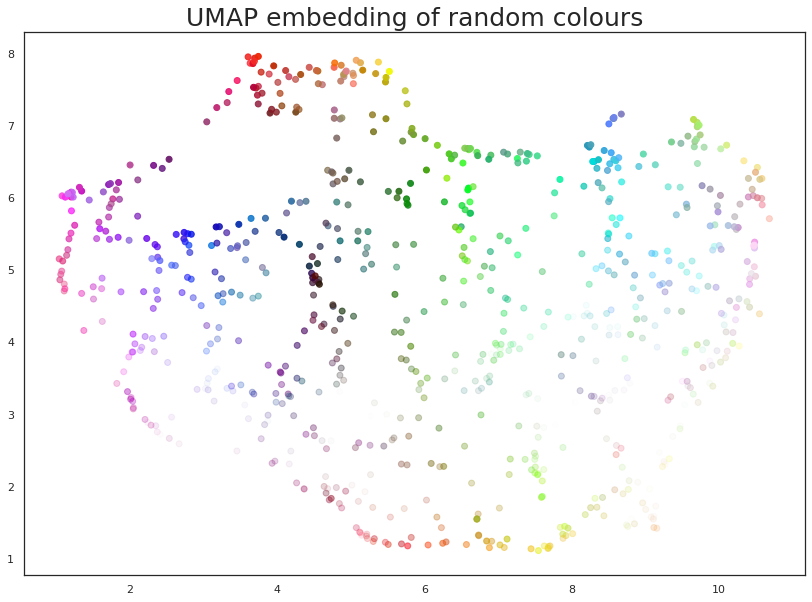

In [6]:
plt.scatter(u[:,0], u[:,1], c=data)
plt.title('UMAP embedding of random colours', fontsize=25);

# Hyperparameters matter

UMAP has several hyperparameters that can have a significant impact on the resulting embedding. In this notebook we will be covering the four major ones:

    n_neighbors
    min_dist
    n_components
    metric


In [7]:
def compute_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean'):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    
    return u

In [8]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=data)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data, s=100)
    plt.title(title, fontsize=18)

# `n neighbors`

- This parameter controls how UMAP balances local versus global structure in the data. It does this by constraining the size of the local neighborhood UMAP will look at when attempting to learn the manifold structure of the data. 

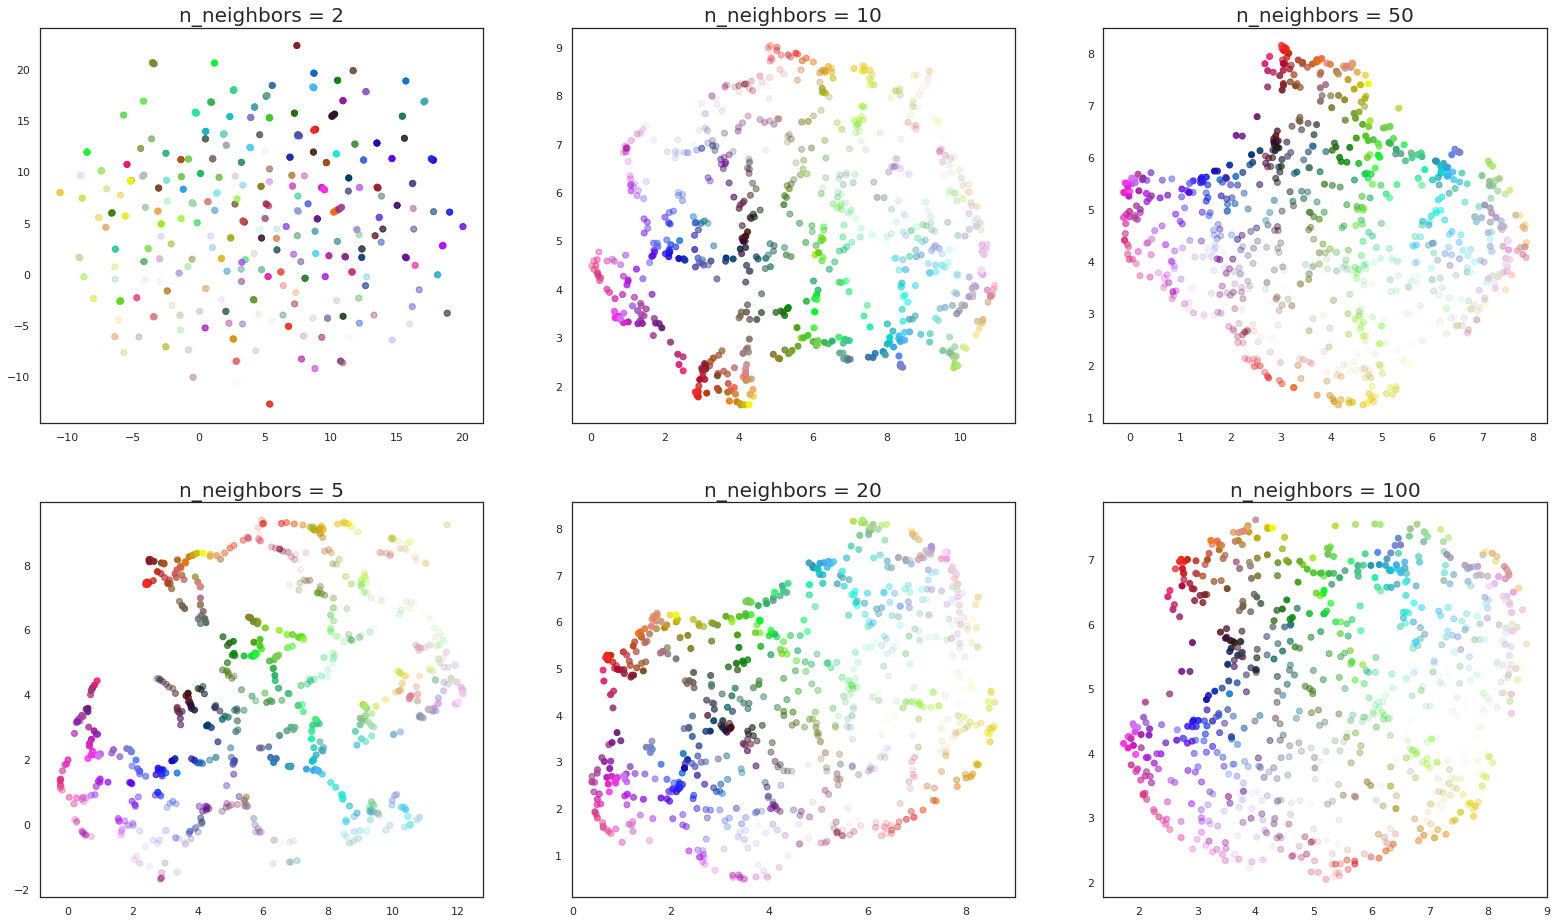

In [9]:
rows = 2
cols = 3

fig, ax = plt.subplots(rows, cols, figsize=(9*cols, 8*rows))

for i,n in enumerate([2, 5, 10, 20, 50, 100]):
    idx = (i%rows, i//rows)
    
    u = compute_umap(n_neighbors=n)
    
    ax[idx].scatter(u[:,0], u[:,1], c=data)
    ax[idx].set_title('n_neighbors = {}'.format(n), fontsize=20)

# `min_dist`

- The `min_dist` parameter controls how tightly UMAP is allowed to pack points together. 

- It, quite literally, provides the minimum distance apart that points are allowed to be in the low dimensional representation.

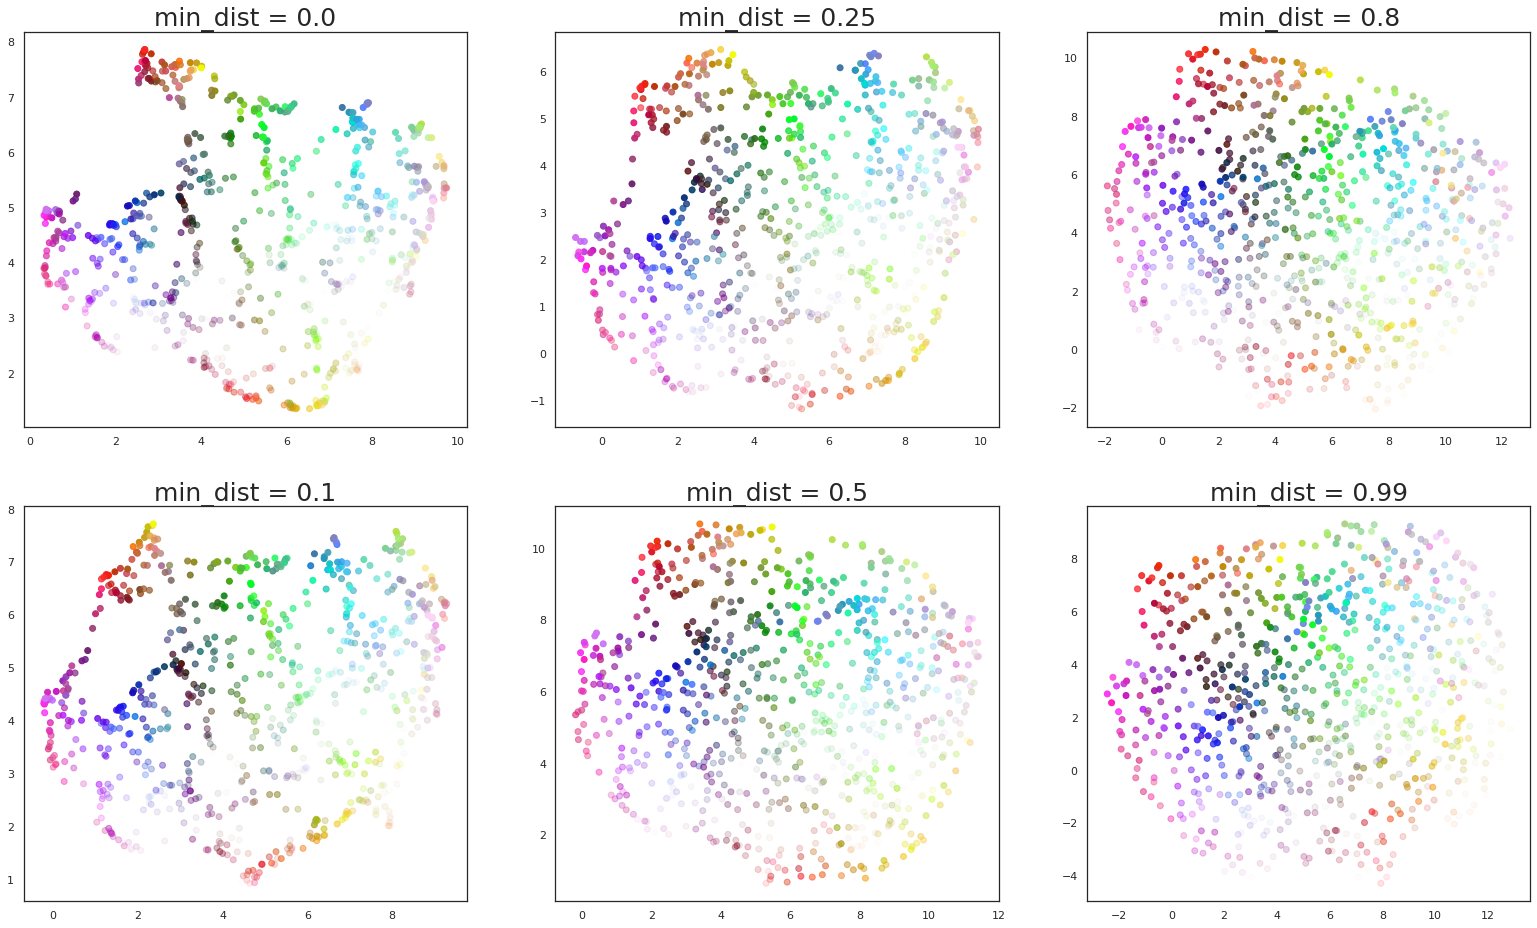

In [10]:
rows, cols = 2,3

fig, ax = plt.subplots(rows, cols, figsize=(9*cols, 8*rows))

for i,d in enumerate([0.0, 0.1, 0.25, 0.5, 0.8, 0.99]):
    idx = (i%rows, i//rows)
    
    u = compute_umap(min_dist=d)
    
    ax[idx].scatter(u[:,0], u[:,1], c=data)
    ax[idx].set_title('min_dist = {}'.format(d), fontsize=25)

# `n_components`

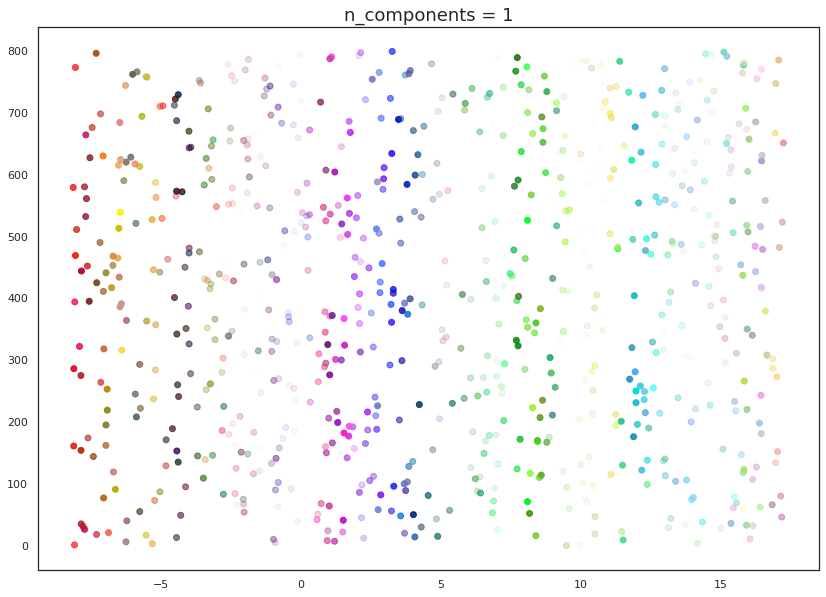

In [11]:
draw_umap(n_components=1, title='n_components = 1')

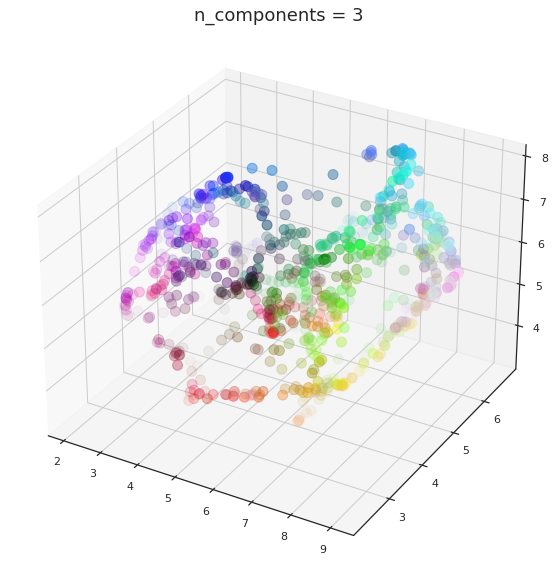

In [12]:
draw_umap(n_components=3, title='n_components = 3')

# `metric`

- This controls how distance is computed in the ambient space of the input data. 

- UMAP can perform the usual metrics out of the box (euclidean, manhattan, chebyschev, canberra, etc.)

- It supports custom user defined metrics as long as those metrics can be compiled in `nopython` mode by numba.

In [13]:
import numba

In [14]:
@numba.njit()
def red_channel_dist(a,b):
    return np.abs(a[0] - b[0])

In [15]:
@numba.njit()
def hue(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    delta = cmax - cmin
    if cmax == r:
        return ((g - b) / delta) % 6
    elif cmax == g:
        return ((b - r) / delta) + 2
    else:
        return ((r - g) / delta) + 4

@numba.njit()
def lightness(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    return (cmax + cmin) / 2.0

@numba.njit()
def saturation(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    chroma = cmax - cmin
    light = lightness(r, g, b)
    if light == 1:
        return 0
    else:
        return chroma / (1 - abs(2*light - 1))

In [16]:
@numba.njit()
def hue_dist(a, b):
    diff = (hue(a[0], a[1], a[2]) - hue(b[0], b[1], b[2])) % 6
    if diff < 0:
        return diff + 6
    else:
        return diff

@numba.njit()
def sl_dist(a, b):
    a_sat = saturation(a[0], a[1], a[2])
    b_sat = saturation(b[0], b[1], b[2])
    a_light = lightness(a[0], a[1], a[2])
    b_light = lightness(b[0], b[1], b[2])
    return (a_sat - b_sat)**2 + (a_light - b_light)**2

@numba.njit()
def hsl_dist(a, b):
    a_sat = saturation(a[0], a[1], a[2])
    b_sat = saturation(b[0], b[1], b[2])
    a_light = lightness(a[0], a[1], a[2])
    b_light = lightness(b[0], b[1], b[2])
    a_hue = hue(a[0], a[1], a[2])
    b_hue = hue(b[0], b[1], b[2])
    return (a_sat - b_sat)**2 + (a_light - b_light)**2 + (((a_hue - b_hue) % 6) / 6.0)

/home/ejam/.local/lib/python3.8/site-packages/umap/umap_.py:1495: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
/home/ejam/.local/lib/python3.8/site-packages/umap/umap_.py:1495: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
/home/ejam/.local/lib/python3.8/site-packages/umap/umap_.py:1495: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
/home/ejam/.local/lib/python3.8/site-packages/umap/umap

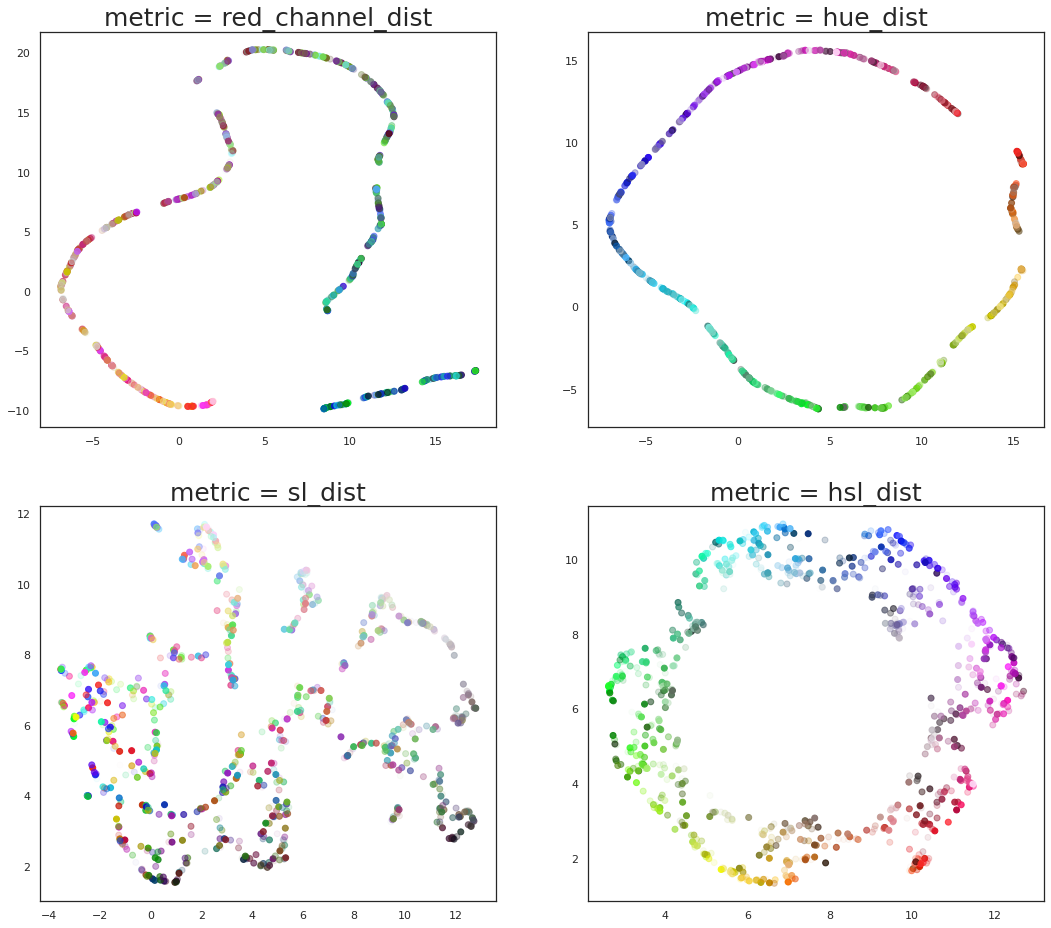

In [17]:
rows, cols = 2,2

fig, ax = plt.subplots(rows, cols, figsize=(9*cols, 8*rows))

for i,m in enumerate([red_channel_dist, sl_dist, hue_dist, hsl_dist]):
    name = m if type(m) is str else m.__name__
    
    idx = (i%rows, i//rows)
    
    u = compute_umap(metric=m)
    
    ax[idx].scatter(u[:,0], u[:,1], c=data)
    ax[idx].set_title('metric = {}'.format(name), fontsize=25)

# Just scratching the surface

- `umap` implementation can perform supervised and semi-supervised dimension reduction.

- Capabilities to align time-dependent data.